In [25]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt   ## Adds custom labels to our Charts
import seaborn as sns	   ## Charting library
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime as dt # Add this line
from scipy import stats
import statsmodels.api as sm

Source used : https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

## Lets Import and Visualize the Data

In [26]:
data = pd.read_csv('./../RAW_DATA/JPMorgan Chase.csv');
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,49.833332,50.250000,48.083332,48.583332,24.406227,12019200
1,2000-01-04,47.083332,47.458332,46.125000,47.250000,23.870712,11723400
2,2000-01-05,46.833332,48.375000,46.000000,46.958332,23.723372,8714550
3,2000-01-06,46.750000,48.625000,46.500000,47.625000,24.060173,8369250
4,2000-01-07,48.416668,49.000000,47.333332,48.500000,24.502220,6571950
...,...,...,...,...,...,...,...
5858,2023-04-17,139.949997,140.059998,137.660004,139.830002,139.830002,16050500
5859,2023-04-18,140.270004,141.779999,139.029999,141.399994,141.399994,13760100
5860,2023-04-19,141.229996,141.500000,140.399994,141.220001,141.220001,9158100
5861,2023-04-20,139.910004,141.429993,139.839996,140.809998,140.809998,10586200


Lets do some data processing:
	1. Lets round up the zeros , to nearest hundredths.
	2. Lets change the Date format to DD-MMM-YYYY.

In [27]:
columns_to_round = ['Open','High','Low','Close','Adj Close'];
data[columns_to_round] = data[columns_to_round].round(2);
# Convert the 'date' column to datetime format
data['Date'] = pd.to_datetime(data['Date']);
# Format the 'date' column as 'DD-MMM-YYYY'
data['Date'] = data['Date'].dt.strftime('%d-%b-%Y');
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-Jan-2000,49.83,50.25,48.08,48.58,24.41,12019200
1,04-Jan-2000,47.08,47.46,46.12,47.25,23.87,11723400
2,05-Jan-2000,46.83,48.38,46.00,46.96,23.72,8714550
3,06-Jan-2000,46.75,48.62,46.50,47.62,24.06,8369250
4,07-Jan-2000,48.42,49.00,47.33,48.50,24.50,6571950
...,...,...,...,...,...,...,...
5858,17-Apr-2023,139.95,140.06,137.66,139.83,139.83,16050500
5859,18-Apr-2023,140.27,141.78,139.03,141.40,141.40,13760100
5860,19-Apr-2023,141.23,141.50,140.40,141.22,141.22,9158100
5861,20-Apr-2023,139.91,141.43,139.84,140.81,140.81,10586200


Let's visualize the data usign some graphs.

Text(0, 0.5, 'Closing prices in USD $')

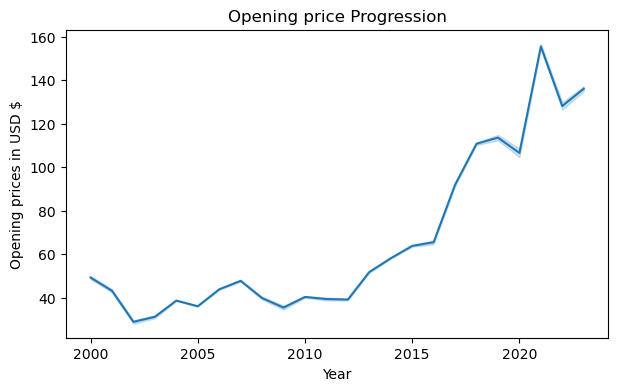

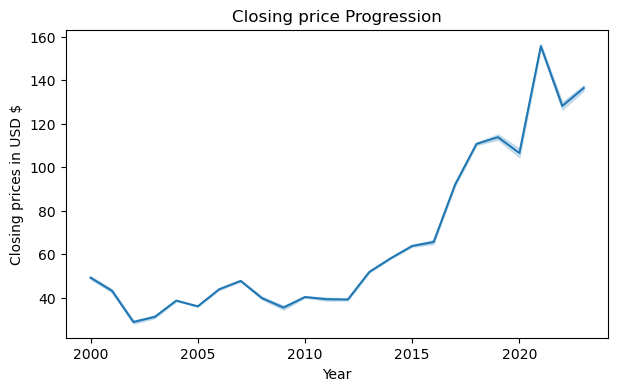

In [28]:
data['year'] = pd.to_datetime(data['Date']).dt.year  ## Lets only show the year , not the dates .

plt.figure(figsize=(7, 4))
lineplot = sns.lineplot(data , x = "year",y = "Open")
# S.pyplotet the labels and title
plt.title('Opening price Progression')
plt.xlabel('Year')
plt.ylabel('Opening prices in USD $')


plt.figure(figsize=(7, 4))
lineplot = sns.lineplot(data , x = "year",y = "Close")
# S.pyplotet the labels and title
plt.title('Closing price Progression')
plt.xlabel('Year')
plt.ylabel('Closing prices in USD $')

But what if we want to see how much the price of the stock changed (Close - Open). Where positive value will mean stock went up in price.

Lets make a new column.

<Axes: title={'center': 'Difference in Closing and Opening prices of stock Data.'}, xlabel='Year', ylabel='Difference in Closing and Opening prices in USD $'>

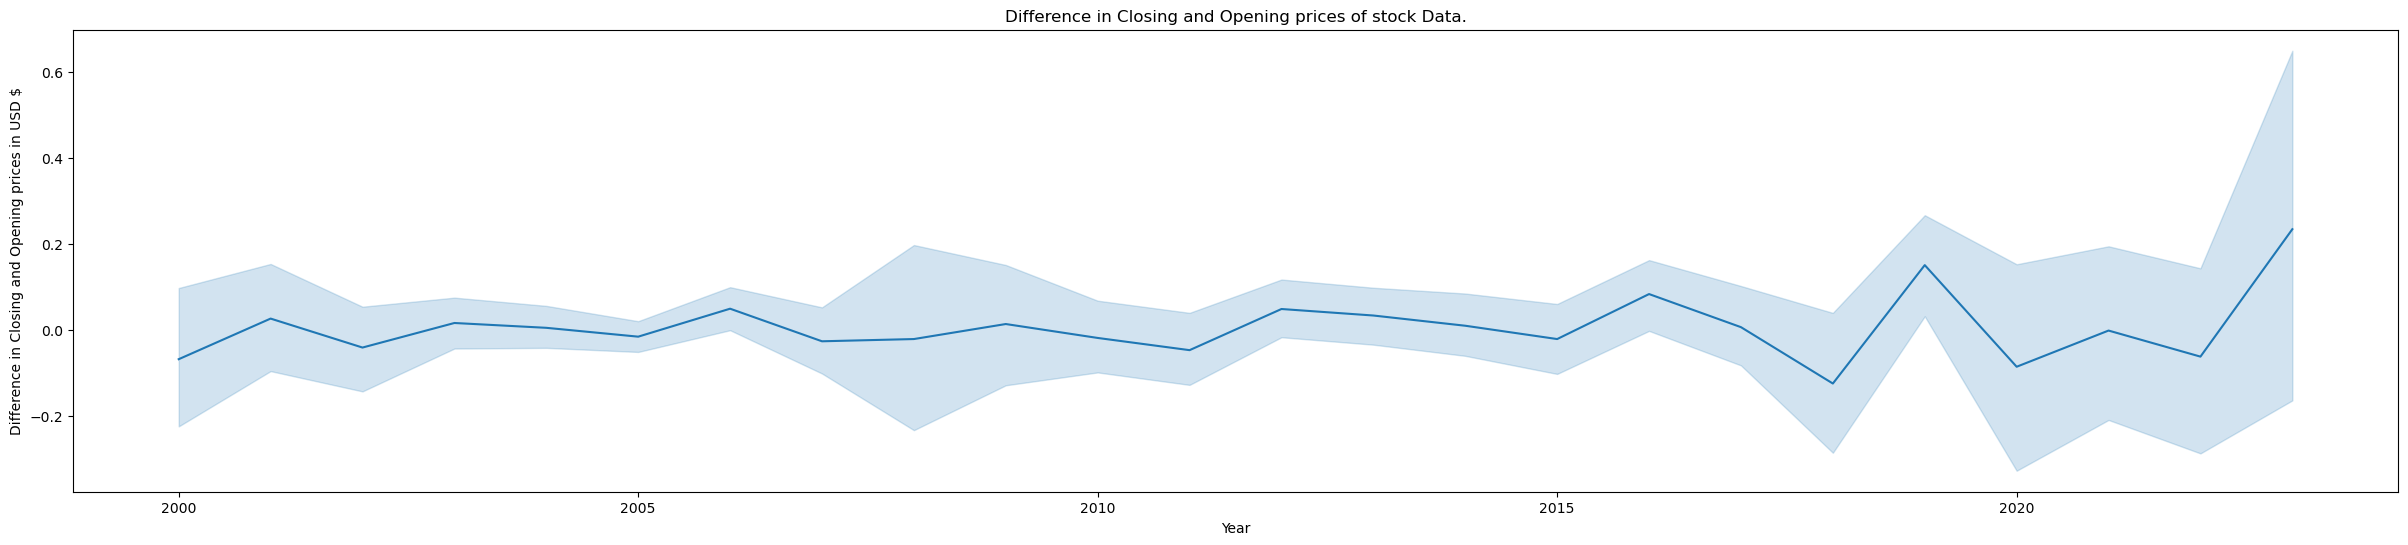

In [29]:
data['Close-Open'] = data['Close'] - data['Open'];
plt.figure(figsize=(30, 6))
lineplot = sns.lineplot(data , x = "year",y = "Close-Open")
plt.title('Difference in Closing and Opening prices of stock Data.');
plt.xlabel('Year');
plt.ylabel('Difference in Closing and Opening prices in USD $');
lineplot

## Moving Average
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [30]:
## First lets prepare the data
ma_day = [10,20,50] ## 10 days , 20 days , 50 days
column_names = [];
for ma in ma_day:
        column_name = f"MA for {ma} days"
        column_names.append(column_name);
        data[column_name] = data['Close-Open'].rolling(ma).mean()

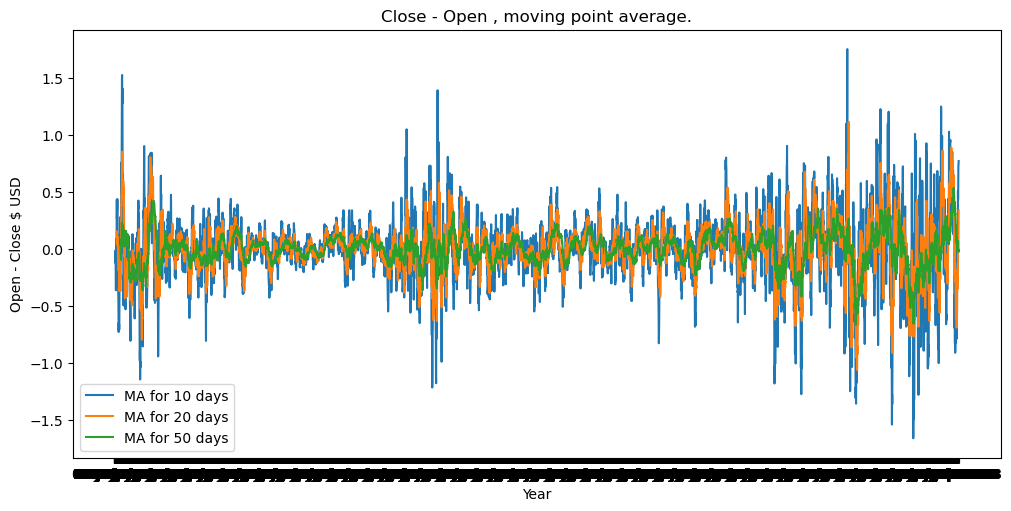

In [31]:
## Lets Make the plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
for col in column_names:
    ax.plot(data['Date'],data[col] , label = col)

ax.set_ylabel("Open - Close $ USD");
ax.set_xlabel("Year");
ax.set_title("Close - Open , moving point average.")  # Add a title to the axes.
ax.legend();

Above Data makes sense , the 50 day avg has relatively less volatility than 10 and 20 Day Graphs. This is expected behaviour.

## Percentage Change of stock Values.

Since perecentage change is a better indicator , of how much money we could have made. Lets plot the rolling percent change values. 

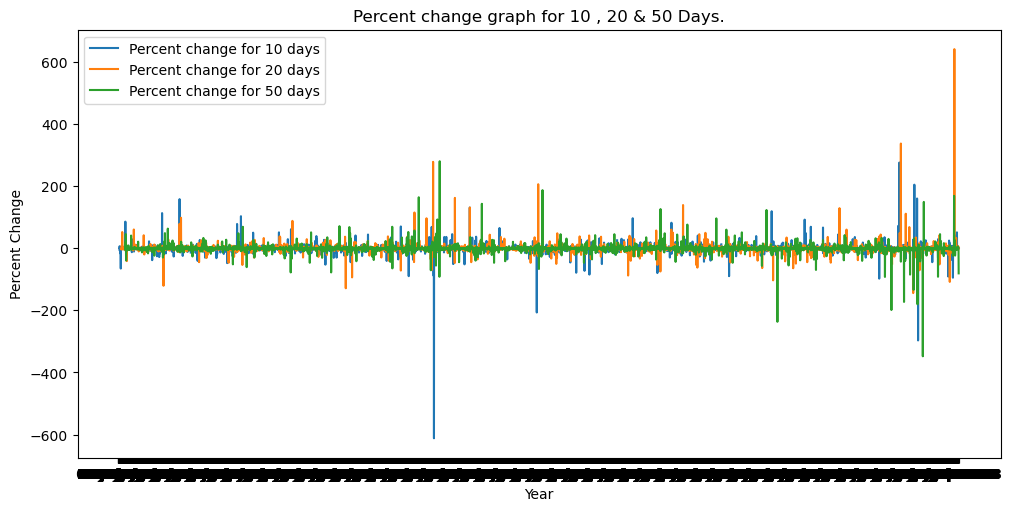

In [32]:
## Lets do percentage change for the previous time valeus ie 10 , 20 , 50 days.
## First lets prepare the data
ma_day = [10,20,50] ## 10 days , 20 days , 50 days
percent_column_names = [];
for ma in ma_day:
        column_name = f"Percent change for {ma} days"
        percent_column_names.append(column_name);
        data[column_name] = data['Close-Open'].pct_change(ma)
data
## Now lets plot them.
## Lets Make the plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
for col in percent_column_names:
    ax.plot(data['Date'],data[col] , label = col)

ax.set_ylabel("Percent Change");
ax.set_xlabel("Year");
ax.set_title("Percent change graph for 10 , 20 & 50 Days.")  # Add a title to the axes.
ax.legend();

Lets make the above graph more usefull ?
Lets add the volume indicator to that.

<Axes: title={'center': 'Volume of stock Traded in Thousands , vs the Year'}, xlabel='Year', ylabel='Volume in thousands , of how much the stock was traded.'>

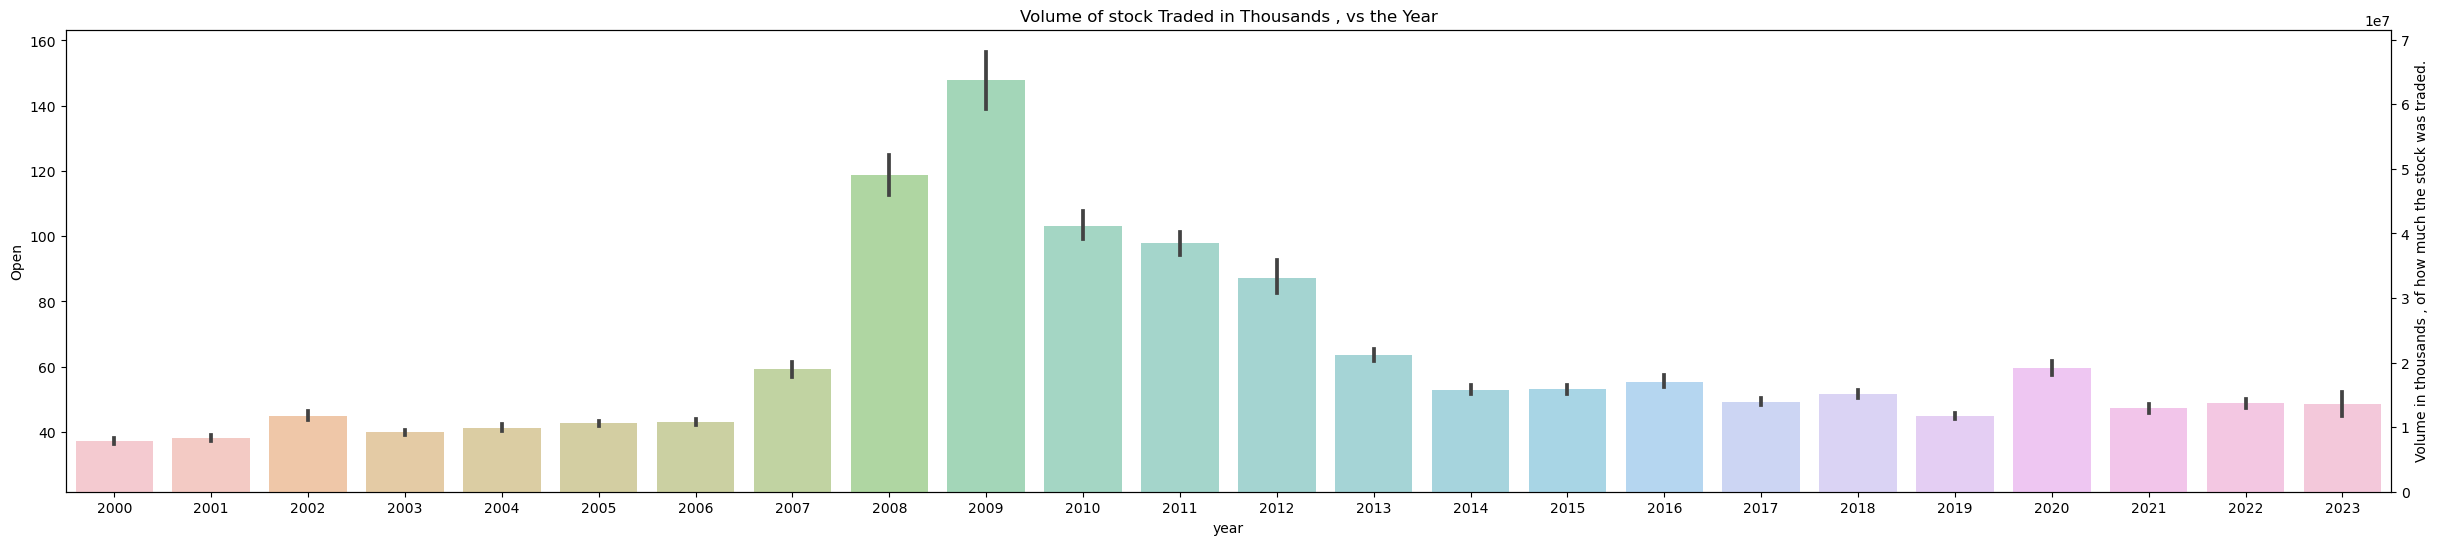

In [33]:
plt.figure(figsize=(30, 6))
lineplot = sns.lineplot(data = data , x = "year",y = "Open");
plt.twinx();
barplot = sns.barplot(data = data , x = "year",y = "Volume",alpha = 0.5 );
# S.pyplotet the labels and title
plt.title('Volume of stock Traded in Thousands , vs the Year');
plt.xlabel('Year');
plt.ylabel('Volume in thousands , of how much the stock was traded.');
barplot

## Machine Learning - Prediction Analysis
There are several ways to predict stock value's.


### 1. Multiple Linear Regression Analysis: 
We will use the 'Open', 'High', 'Low', 'Volume' variables as the input variabls for the data.

In [34]:
linear_reg_data = data[['Date','Open', 'High', 'Low', 'Volume','Close']];
linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats
linear_reg_data = linear_reg_data.dropna(subset=['Date'])
# Convert datetime objects to ordinal
linear_reg_data['Date'] = linear_reg_data['Date'].apply(lambda x: x.toordinal())
# Assume we have 'Open', 'High', 'Low', 'Volume' columns and we want to predict 'Close' price.
x = linear_reg_data[['Open', 'High', 'Low', 'Volume']]
y = linear_reg_data['Close']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a Linear Regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

/var/folders/dr/pf1stp7s4f12_v9y6qm60jxr0000gn/T/ipykernel_25260/806651729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats


Let's review some of the formulas, that we use to figure out how accurate our models are .

1. Mean Square Error - Average of all (predicted - actual) of all our testing data. Therefore the lower this number , the more acurate our model. On average our model was 20% wrong in predicting the closing price , or 80% accurate in predicting the closing price.

2. Coefficient of Determination - How well our model predicts the Closing price. Value of 1 means , our model predicts the closing price quite well.

3. Coefficient variables - How good the variable was in predicting the Y value , if too low has to go. Or if the value is very close to zero , that means it is not a good indicator.


In [35]:
# Print out the coefficients of the model
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % metrics.r2_score(y_test, y_pred))

Coefficients: 
 [-5.87583137e-01  8.26923389e-01  7.59908348e-01 -5.55772966e-11]
Mean squared error: 0.20
Coefficient of determination (R^2): 1.00


#### What can we infer from this ?
We see that While the Open , High , Close are good variables in predicting the closing price . The Volume of the stock is not a good indicator. So now we can design a new refined model , that excludes this varibale.

In [36]:
linear_reg_data = data[['Date','Open', 'High', 'Low','Close']];
linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats
linear_reg_data = linear_reg_data.dropna(subset=['Date'])
# Convert datetime objects to ordinal
linear_reg_data['Date'] = linear_reg_data['Date'].apply(lambda x: x.toordinal())
# Assume we have 'Open', 'High', 'Low', 'Volume' columns and we want to predict 'Close' price.
x = linear_reg_data[['Open', 'High', 'Low']]
y = linear_reg_data['Close']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a Linear Regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)





# Print out the coefficients of the model
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % metrics.r2_score(y_test, y_pred))

Coefficients: 
 [-0.58758597  0.82648742  0.76036095]
Mean squared error: 0.20
Coefficient of determination (R^2): 1.00


/var/folders/dr/pf1stp7s4f12_v9y6qm60jxr0000gn/T/ipykernel_25260/4203371469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats


Conclusion of Multiple Linear regression :
We see that our Independent variables are quite good at predicting our dependent variable . Although i suggest lets try to reduce the training size , meaning lets only train the data on just the last 50 Days. Which makes sense , because when the stock initially got released it , that model should have very little effect on the more recent price of the stock.

In [37]:
Train_data_on_last_n_rows = 100;
linear_reg_data = data[['Date','Open', 'High', 'Low','Close']];
linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats
linear_reg_data = linear_reg_data.dropna(subset=['Date'])
# Convert datetime objects to ordinal
linear_reg_data['Date'] = linear_reg_data['Date'].apply(lambda x: x.toordinal())
# Assume we have 'Open', 'High', 'Low', 'Volume' columns and we want to predict 'Close' price.
linear_reg_data = linear_reg_data.tail(Train_data_on_last_n_rows);
x = linear_reg_data[['Open', 'High', 'Low']]
y = linear_reg_data['Close']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a Linear Regression object
regressor = LinearRegression();

# Train the model using the training sets
regressor.fit(X_train, y_train);

# Make predictions using the testing set
y_pred = regressor.predict(X_test);

## test a different libary to fit the model.

# Add a constant to the independent value
x = sm.add_constant(x)

# Conduct the multiple linear regression
model = sm.OLS(y, x).fit()

# Print out the statistics
print(model.summary())

## end of test 
# Print out the coefficients of the model
print('Coefficients: \n', regressor.coef_)


# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % metrics.r2_score(y_test, y_pred))

/var/folders/dr/pf1stp7s4f12_v9y6qm60jxr0000gn/T/ipykernel_25260/3288111323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1534.
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.16e-81
Time:                        22:58:27   Log-Likelihood:                -113.78
No. Observations:                 100   AIC:                             235.6
Df Residuals:                      96   BIC:                             246.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5895      2.119     -0.278      0.7

The p-values (smaller p values prove correlation) associated with our dependent variables prove that our input variables indeed do a good job in predicting the y variables. Therefor at this point our model is as optimized as possible.

What we found was the smaller our data size is , the more error prone our data gets . Therefore our model is better to train on as large of a dataset as possible. 

Therefore lets stick to our previous model, and plot it on a graph , how well it predicts the close price. Although for that we will have to convert our model into a function first.

In [63]:
def multiple_linear_reg_model(train_data):
	"""
	Pass this method the data , and it will return the y-predicted close value for the latest data, This will rely on the n-1 to train the model.
      
      Also since we have already tested the variables , if they successfully help predict the Close price , we do not need to report the numbers.
      
      Ideally train data can be all the stock data we have up until the latest date , and then we can use the model to predict Todays Closing price.
	"""
	linear_reg_data = train_data[['Date','Open', 'High', 'Low','Close']];
	linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats
	linear_reg_data = linear_reg_data.dropna(subset=['Date'])
	# Convert datetime objects to ordinal
	linear_reg_data['Date'] = linear_reg_data['Date'].apply(lambda x: x.toordinal())
	# Assume we have 'Open', 'High', 'Low', 'Volume' columns and we want to predict 'Close' price.
	x = linear_reg_data[['Open', 'High', 'Low']]
	y = linear_reg_data['Close']
	
	# Create a Linear Regression object
	regressor = LinearRegression()
	# Train the model using the training sets
	regressor.fit(x, y)
	# Make predictions using the testing set
	return regressor;
	
model = multiple_linear_reg_model(data); ## pass this the train data

for index, row in data.tail(round(len(data) * 0.2)).iterrows():
    prediction = model.predict([[row['Open'], row['High'], row['Low']]])
    data.loc[index, 'MLR_Prediction'] = prediction


data


/var/folders/dr/pf1stp7s4f12_v9y6qm60jxr0000gn/T/ipykernel_25260/3419594861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_reg_data['Date'] = pd.to_datetime(linear_reg_data['Date'], errors='coerce')  # Add 'errors' parameter to handle any incorrect date formats
/opt/homebrew/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/Machine_Learning/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/envs/Machine_Learning/lib/pyth

,Date,Open,High,Low,Close,Adj Close,Volume,year,Close-Open,MA for 10 days,MA for 20 days,MA for 50 days,Percent change for 10 days,Percent change for 20 days,Percent change for 50 days,MLR_Prediction,Predictions
0,03-Jan-2000,49.83,50.25,48.08,48.58,24.41,12019200,2000,-1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04-Jan-2000,47.08,47.46,46.12,47.25,23.87,11723400,2000,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
2,05-Jan-2000,46.83,48.38,46.00,46.96,23.72,8714550,2000,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-Jan-2000,46.75,48.62,46.50,47.62,24.06,8369250,2000,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07-Jan-2000,48.42,49.00,47.33,48.50,24.50,6571950,2000,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,17-Apr-2023,139.95,140.06,137.66,139.83,139.83,16050500,2023,-0.12,0.433,-0.0180,0.0702,-1.184615,-0.953307,-0.886792,138.224464,NaN
5859,18-Apr-2023,140.27,141.78,139.03,141.40,141.40,13760100,2023,1.13,0.521,0.0310,0.0346,3.520000,6.533333,-0.611684,140.484899,140.0
5860,19-Apr-2023,141.23,141.50,140.40,141.22,141.22,9158100,2023,-0.01,0.728,0.0325,0.0006,-0.995192,-0.750000,-1.005917,140.742964,NaN
5861,20-Apr-2023,139.91,141.43,139.84,140.81,140.81,10586200,2023,0.90,0.737,0.2465,-0.0268,0.111111,-1.266272,-0.603524,141.021677,141.0


Now lets put every row of our dataset through the model , and get the Predicted close value. I assume this will be quite a compute heavy task. But lets do it regardless.

### Plotting the prediction result against the actual values.

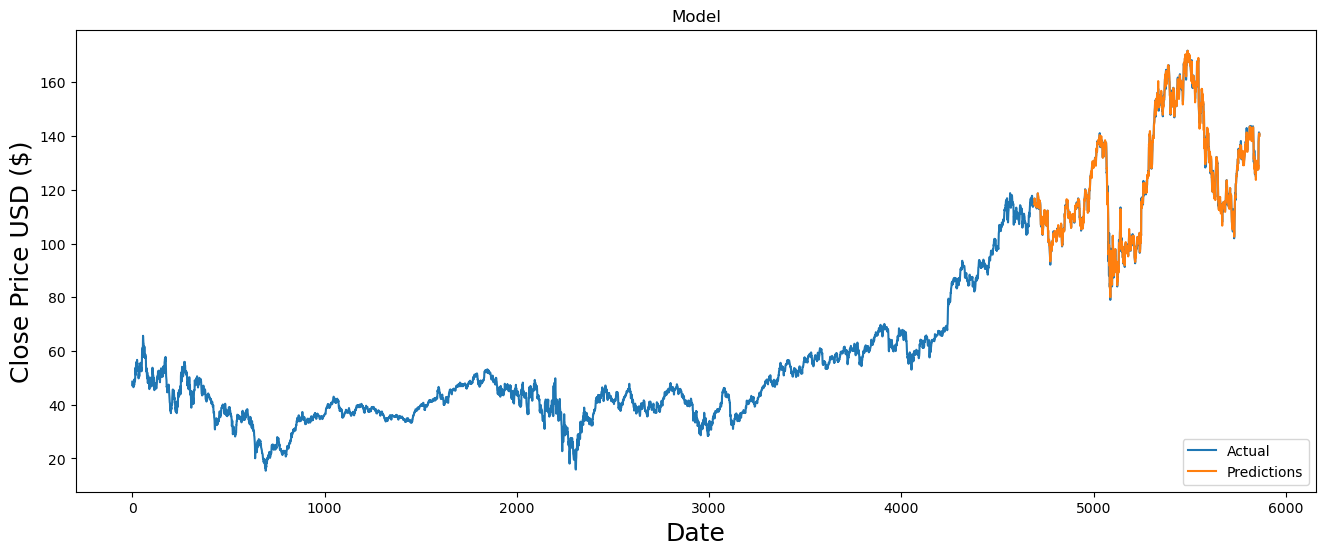

In [64]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Close'])
plt.plot(data[['MLR_Prediction']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()